In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Exploratry data Analysis

In [3]:
read_accident_data=pd.read_csv(r'F:\internship2020_kaggle\final_project\road-accidents.csv',sep='|',skiprows=9)
print(read_accident_data.shape)
read_accident_data.head()

(51, 5)


,state,drvr_fatl_col_bmiles,perc_fatl_speed,perc_fatl_alcohol,perc_fatl_1st_time
0,Alabama,18.8,39,30,80
1,Alaska,18.1,41,25,94
2,Arizona,18.6,35,28,96
3,Arkansas,22.4,18,26,95
4,California,12.0,35,28,89


In [4]:
mile_der_data=pd.read_csv(r'F:\internship2020_kaggle\final_project\miles-driven.csv',sep='|')
mile_der_data.head()

,state,million_miles_annually
0,Alabama,64914
1,Alaska,4593
2,Arizona,59575
3,Arkansas,32953
4,California,320784


# Merge two dataset and comute total number of accident

In [7]:
#merge the two datsets based on the state column
data=pd.merge(read_accident_data,mile_der_data,on='state')

#compute the no of accidents
data['no_fal_accitends']=(data['drvr_fatl_col_bmiles']*data['million_miles_annually']/1000).astype(int)

# for the comaprision purpose it is not fair they are in the form of pertentage so i chaged those into numbers
# after changing those into numbers i can found the correlation correctly

data['no_falt_alcohol']=((data['perc_fatl_alcohol']*data['no_fal_accitends'])/100).astype(int)
data['no_fal_speed']=((data['perc_fatl_speed']*data['no_fal_accitends'])/100).astype(int)
data['no_falt_1st_time']=((data['perc_fatl_1st_time']*data['no_fal_accitends'])/100).astype(int)

#copy neccesary data to new datframe 
feature_name=['state','no_falt_1st_time','no_fal_speed','no_falt_alcohol','no_fal_accitends']
data_acci=data[feature_name]
data_acci.head()

,state,no_falt_1st_time,no_fal_speed,no_falt_alcohol,no_fal_accitends
0,Alabama,976,475,366,1220
1,Alaska,78,34,20,83
2,Arizona,1063,387,310,1108
3,Arkansas,701,132,191,738
4,California,3425,1347,1077,3849


# Explotary data analysis

In [8]:
# some statistical summary 
data_acci.describe()

,no_falt_1st_time,no_fal_speed,no_falt_alcohol,no_fal_accitends
count,51.000000,51.000000,51.00000,51.000000
mean,785.862745,280.803922,274.45098,894.392157
std,821.031449,335.047162,306.30020,927.478864
min,21.000000,7.000000,5.00000,21.000000
25%,246.500000,88.000000,95.00000,266.500000
50%,601.000000,153.000000,191.00000,633.000000
75%,1002.000000,327.000000,370.00000,1136.500000
max,4007.000000,1842.000000,1750.00000,4606.000000


#### usually it is easy to see the correlatio between the columns using the seaborn 

In [13]:
data_acci.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   state             51 non-null     object
 1   no_falt_1st_time  51 non-null     int32 
 2   no_fal_speed      51 non-null     int32 
 3   no_falt_alcohol   51 non-null     int32 
 4   no_fal_accitends  51 non-null     int32 
dtypes: int32(4), object(1)
memory usage: 3.4+ KB


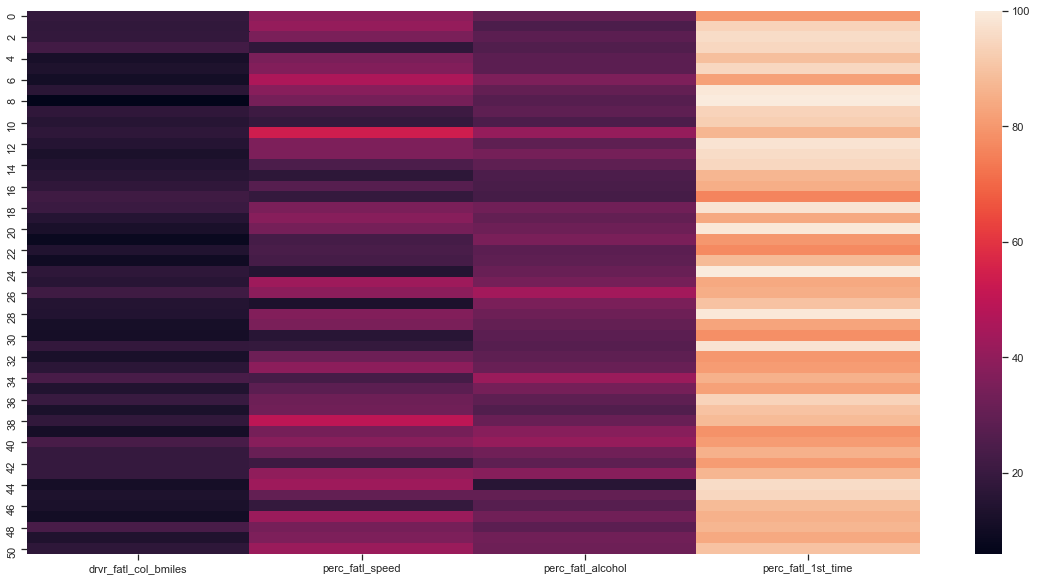

In [44]:
plt.figure(figsize=(20,10))
sns.heatmap(read_accident_data.iloc[:,[1,2,3,4]])

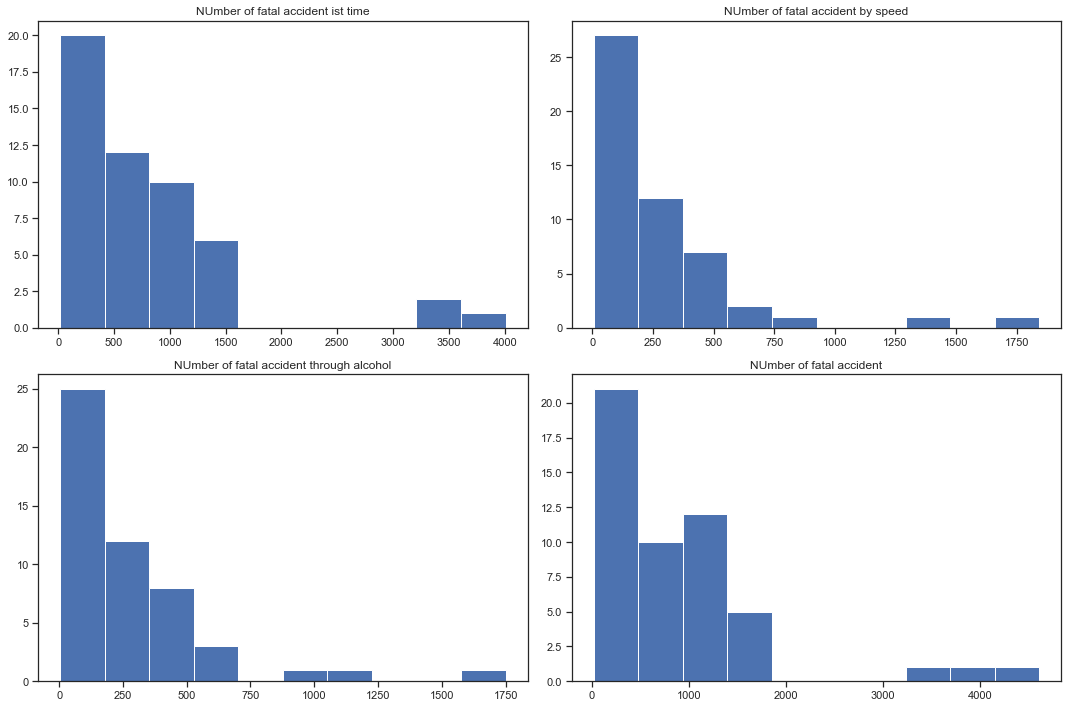

In [18]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(15,10))
a1,a2,a3,a4 = axes.flatten()

a1.hist(data_acci['no_falt_1st_time'])
a1.set_title('NUmber of fatal accident ist time')
a2.hist(data_acci['no_fal_speed'])
a2.set_title('NUmber of fatal accident by speed')
a3.hist(data_acci['no_falt_alcohol'])
a3.set_title('NUmber of fatal accident through alcohol')
a4.hist(data_acci['no_fal_accitends'])
a4.set_title('NUmber of fatal accident')

plt.tight_layout()
plt.show()

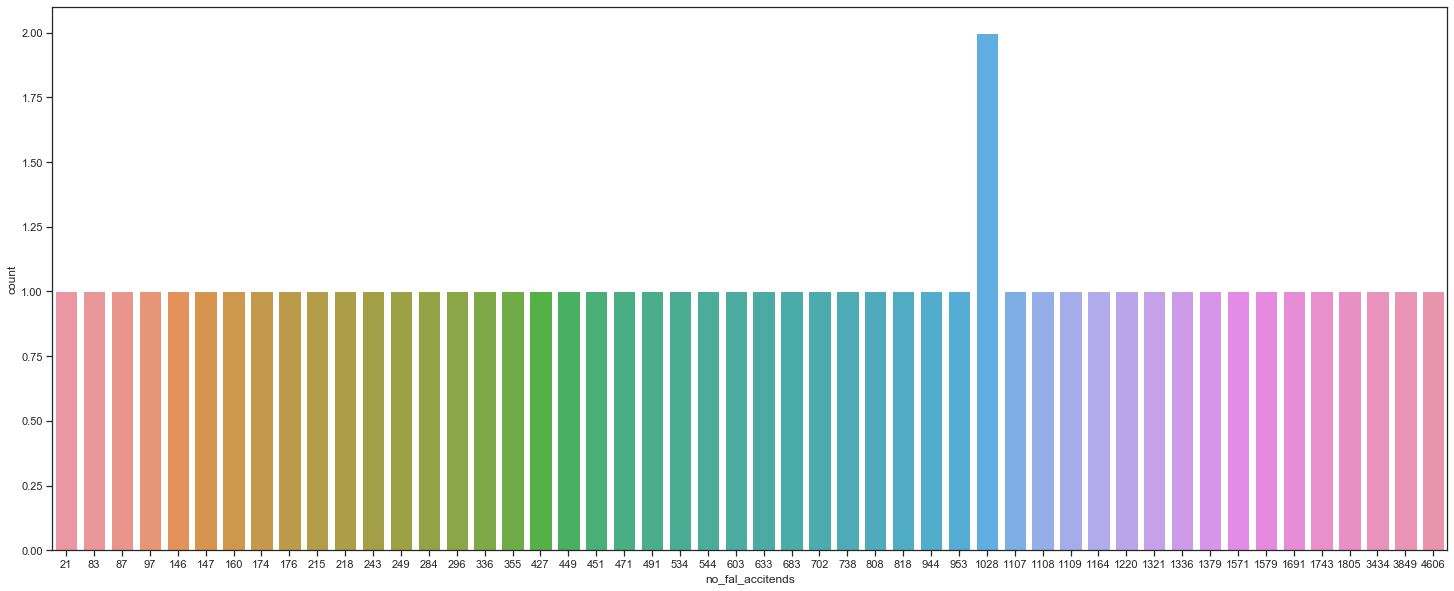

In [21]:
plt.figure(figsize=(25,10))
sns.countplot(data_acci['no_fal_accitends'])

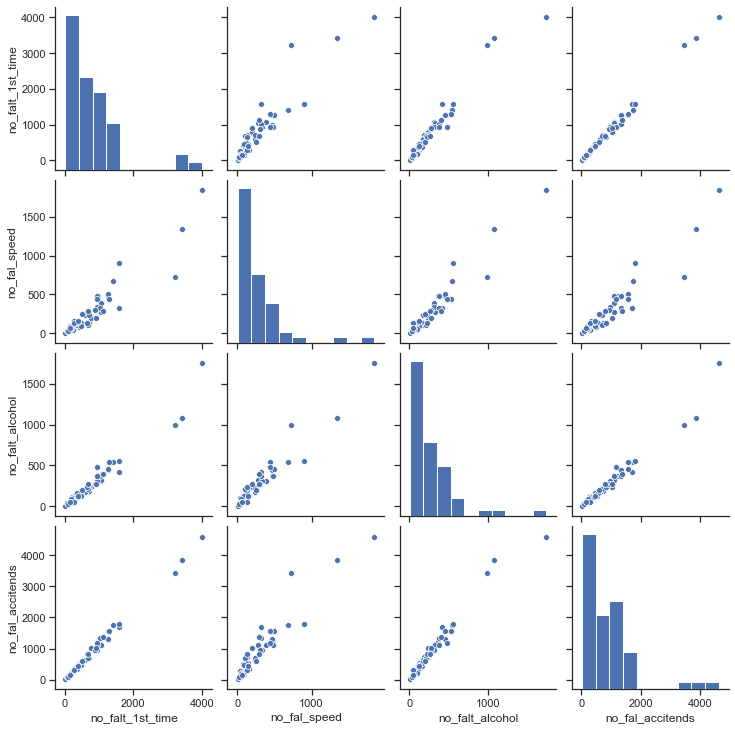

In [9]:
#deeper unserstanding through some distribution visualization
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(data_acci)

###### Pearson correlation coefficinet is also the way to find the correlation between the features and it is used to quantify the 
correlation between that. ranges from -1 - 1 <br/>
-1 opposite correlation<br/>
0 no correlation<br/>
1 strong correlation

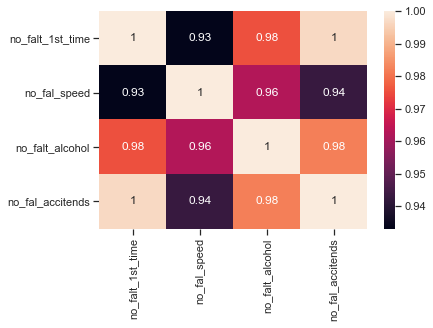

In [12]:
#Pearson correlation coefficient matrix through pandas
corr=data_acci.corr(method='pearson')
sns.heatmap(corr,annot=True)

# multivariant linear regression
From the correlation table, we see that the amount of fatal accidents is most strongly correlated with alcohol consumption (first row). But in addition, we also see that some of the features are correlated with each other, for instance, speeding and alcohol consumption are positively correlated. We, therefore, want to compute the association of the target with each feature while adjusting for the effect of the remaining features. This can be done using multivariate linear regression

In [24]:
#fit the multivariant linear regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(data_acci.iloc[:,1:-1].values,data_acci['no_fal_accitends'])
lr.coef_

array([0.90908699, 0.09220681, 0.49904351])

 from this we can say that the alcohol consumption is weakly correlated to the number of accidents.This could lead us to conclude that alcohol consumption should be a focus for further investigations and maybe strategies should divide states into high versus low alcohol consumption in accidents

# PCA

In [25]:
# pca 
#PCA uses the absolute variance to calculate the overall variance explained for each principal component, 
#so it is important that the features are on a similar scale

# sclaing the data
from sklearn.preprocessing import StandardScaler

#create scalar object
scalar=StandardScaler()

#fit and transform the data 
data_scaled=scalar.fit_transform(data_acci.iloc[:,1:-1])

#transform numpy array to dataframe to apply the iloc function
data_scaled=pd.DataFrame(data_scaled)

#apply  PCA for feature extraction process
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

pca.fit(data_scaled)
data_scaled.head()

,0,1,2
0,0.233888,0.585376,0.301861
1,-0.870742,-0.743954,-0.838990
2,0.340906,0.320112,0.117214
3,-0.104390,-0.448548,-0.275159
4,3.246402,3.213892,2.646210


In [26]:
#transform the value to reduced dimention for visualization
data_pca=pca.transform(data_scaled)

print(f" the shape before PCA reduction{data_scaled.shape}\n {'-'*70}")
print(f"The shape after PCA reduction {data_pca.shape}")

data_pca[0:5]

 the shape before PCA reduction(51, 3)
 ----------------------------------------------------------------------
The shape after PCA reduction (51, 2)


array([[ 0.64628274, -0.26073162],
       [-1.41693045, -0.08862267],
       [ 0.44830914, -0.01291168],
       [-0.47762698,  0.24205929],
       [ 5.25478449, -0.0634951 ]])

In [27]:
influence_table=pd.DataFrame(pca.components_,columns=data_acci.columns[1:-1])
influence_table

,no_falt_1st_time,no_fal_speed,no_falt_alcohol
0,0.576276,0.573606,0.582136
1,0.636016,-0.762082,0.121302


This value tells us 'how much' the feature influences the PC here the value 0.58 means how  mach that influence on the principle component.
So the higher the value in absolute value, the higher the influence on the principal component

In [28]:
# shape(n_componetions,n_features) Principal axes in feature space, representing the directions of maximum variance in the data. 
pca.components_

array([[ 0.57627556,  0.57360587,  0.5821364 ],
       [ 0.63601626, -0.76208215,  0.12130176]])

explained variance ratio of each principal
component, available via the explained_variance_ratio_ variable. It indicates
the proportion of the dataset’s variance that lies along the axis of each principal component.
For example, let’s look at the explained variance ratios of the first two components
of the 3D dataset represented 

This tells you that 97.1% of the dataset’s variance lies along the first axis, and 2.2%
lies along the second axis. This leaves less than 0.7% for the third axis, so it is reasonable
to assume that it probably carries little information.

In [29]:
pca.explained_variance_ratio_
pca.mean_

array([-4.13612499e-17, -1.52383552e-17,  4.57150657e-17])

find the relationship between the states(US states) using the clustering algorithm. for that we have first find the number of clusters using the kemans elbo method, bashed on the elbo results set the number of clusters and predict which state belonged to which cluster.

# KMeans clustering

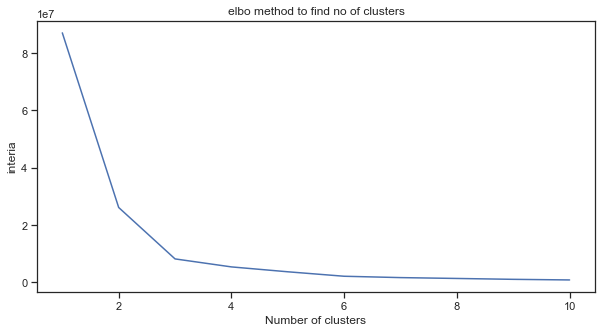

In [97]:
#import kmean from sklean cluster
from sklearn.cluster import KMeans

#find the number of clusters using the elbo method
data=data_acci.iloc[:,1:]
ws=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    ws.append(kmeans.inertia_)

# plot the elbo
plt.figure(figsize=(10,5))
plt.plot(range(1,11),ws)
plt.title('elbo method to find no of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('interia')
plt.show()

### interia is the Sum of squared distances of samples to their closest cluster center.
from this before the no of cluster 3 the differences in the curve is greater after that it slowly reduced so we can use the 3 to number of cluster for our state dataset

In [98]:
#fit the kmeans 
kmeans=KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [99]:
# find the labels for each sample ,like which class they belonged to
label=kmeans.labels_
label

array([0, 1, 0, 1, 2, 1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2,
       1, 1, 0, 1, 1, 1, 1])

In [104]:
# make dataframe with the state name and labels from the kmeans
state_cluster=pd.DataFrame(data_acci)
state_cluster['cl']=label
state_cluster

,state,no_falt_1st_time,no_fal_speed,no_falt_alcohol,no_fal_accitends,clusters,cl
0,Alabama,976,475,366,1220,0,0
1,Alaska,78,34,20,83,1,1
2,Arizona,1063,387,310,1108,0,0
3,Arkansas,701,132,191,738,1,1
4,California,3425,1347,1077,3849,2,2
5,Colorado,601,234,177,633,1,1
6,Connecticut,275,154,120,336,1,1
7,Delaware,144,55,43,146,1,1
8,District of Columbia,21,7,5,21,1,1
9,Florida,3227,721,995,3434,2,2


Let's see how the PCA scatter plot looks if we color the states according to the cluster to which they are assigned.
here we can take first 2 features i mean the 'speed and 1st time' to x,y axis and use 'alcohol consumption ' for size of the scatter plot

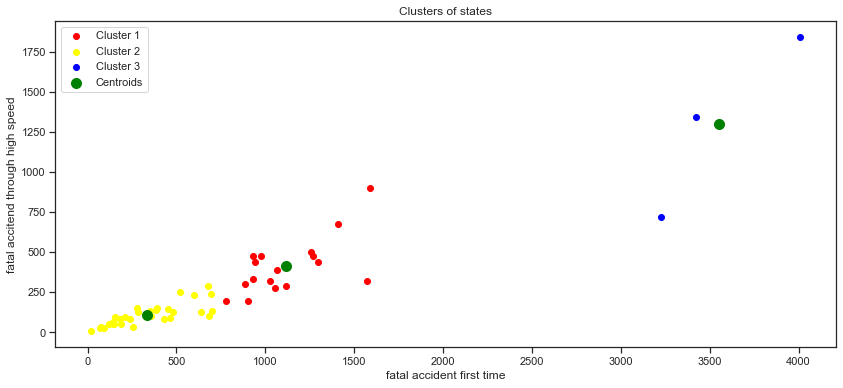

In [101]:
#visualize the kmeans results
#data=data.iloc[:,:].values
state_cluster=state_cluster.iloc[:,:].values
y_kmeans=kmeans.predict(data)


plt.figure(figsize=(14,6))
plt.scatter(state_cluster[y_kmeans == 0, 1], state_cluster[y_kmeans == 0, 2], c = 'red', label = 'Cluster 1')
plt.scatter(state_cluster[y_kmeans == 1, 1], state_cluster[y_kmeans == 1, 2], c = 'yellow', label = 'Cluster 2')
plt.scatter(state_cluster[y_kmeans == 2, 1], state_cluster[y_kmeans == 2, 2], c = 'blue', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'green', label = 'Centroids')
plt.title('Clusters of states')
plt.xlabel('fatal accident first time')
plt.ylabel('fatal accitend through high speed')
plt.legend()
plt.show()

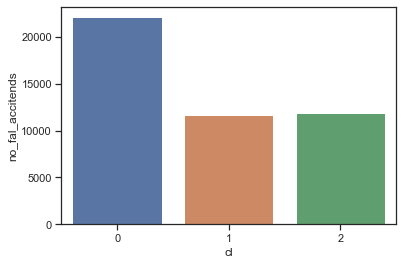

In [107]:
state_cluster=pd.DataFrame(state_cluster)

sns.barplot(x="cl",y="no_fal_accitends",data=state_cluster,ci=None,estimator=sum)

from this clusters we can come to the police have to give more atention to cluster 1
# cluster 1


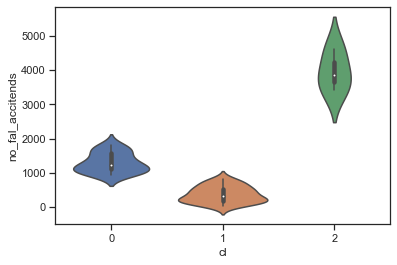

In [108]:
sns.violinplot(x="cl",y="no_fal_accitends",data=state_cluster)